# Front Matter: CASA0007: Quantitative Methods

## Title:

### Student ID: 21203086 


# Reproducible Analysis

## Introduction-overview

This notebook holds the analysis for the 
After a first exploration of the datasets with visualisations that seek to quantify the current picture 

Data used for this analysis were obtained from the following sources:
* Online database for the Sustainable Development Report 2021: <https://dashboards.sdgindex.org/static/downloads/files/SDR%202021%20-%20Database.xlsx>
* education data : <https://stats.oecd.org/viewhtml.aspx?datasetcode=EAG_NEAC&lang=en>



## Libraries

In [1]:
# import the main libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

## Data import

In [88]:
# Load in the data 
df = pd.read_excel('https://dashboards.sdgindex.org/static/downloads/files/SDR%202021%20-%20Database.xlsx?raw=true', sheet_name="Raw Data")
df.head(3)

,Country Code ISO3,Country,Regions used for the SDG Index & Dashboard,Population in 2020,Poverty headcount ratio at $1.90/day (%),Poverty headcount ratio at $3.20/day (%),Poverty rate after taxes and transfers (%),Prevalence of undernourishment (%),Prevalence of stunting in children under 5 years of age (%),Prevalence of wasting in children under 5 years of age (%),...,Press Freedom Index (best 0-100 worst),Access to and affordability of justice (worst 0–1 best),"Persons held in prison (per 100,000 population)",Government spending on health and education (% of GDP),For high-income and all OECD DAC countries: International concessional public fi,Other countries: Government revenue excluding grants (% of GDP),Corporate Tax Haven Score (best 0-100 worst),Financial Secrecy Score (best 0-100 worst),Shifted profits of multinationals (US$ billion),Statistical Performance Index (worst 0-100 best)
0,AFG,Afghanistan,E. Europe & C. Asia,"38,928,341.00",NaN,NaN,NaN,29.90,38.20,5.10,...,37.70,0.49,NaN,4.54,NaN,13.04,0.00,NaN,NaN,49.76
1,ALB,Albania,E. Europe & C. Asia,"2,877,800.00",0.16,8.50,NaN,3.60,11.30,1.60,...,30.25,0.53,NaN,6.45,NaN,25.34,0.00,NaN,NaN,75.38
2,DZA,Algeria,MENA,"43,851,043.00",0.37,2.89,NaN,2.80,11.70,4.10,...,45.52,0.55,NaN,8.43,NaN,40.42,0.00,NaN,NaN,55.15


In [3]:
# size of dataframe
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 193 x 125


In [4]:
# extract the column names
cols=df.columns
print(cols)
print()
print(f"The dataset has {len(cols)} columns")

Index(['Country Code ISO3', 'Country',
       'Regions used for the SDG Index & Dashboard', 'Population in 2020',
       'Poverty headcount ratio at $1.90/day (%)',
       'Poverty headcount ratio at $3.20/day (%)',
       'Poverty rate after taxes and transfers (%)',
       'Prevalence of undernourishment (%)',
       'Prevalence of stunting in children under 5 years of age (%)',
       'Prevalence of wasting in children under 5 years of age (%)',
       ...
       'Press Freedom Index (best 0-100 worst)',
       'Access to and affordability of justice (worst 0–1 best)',
       'Persons held in prison (per 100,000 population)',
       'Government spending on health and education (% of GDP)',
       'For high-income and all OECD DAC countries: International concessional public fi',
       'Other countries: Government revenue excluding grants (% of GDP)',
       'Corporate Tax Haven Score (best 0-100 worst)',
       'Financial Secrecy Score (best 0-100 worst)',
       'Shifted profits o

In [5]:
# store the columns of interest in a list
sub_cols=["Country",
          "Adolescent fertility rate (births per 1,000 females aged 15 to 19)",
          "Subjective well-being (average ladder score, worst 0-10 best)",
          "Literacy rate (% of population aged 15 to 24)",
          "Tertiary educational attainment (% of population aged 25 to 34)",
          "Demand for family planning satisfied by modern methods (% of females aged 15 to ",
          "Ratio of female-to-male mean years of education received (%)",
          "Seats held by women in national parliament (%)",
          "Gender wage gap (% of male median wage)",
          "CO₂ emissions from fuel combustion for electricity and heating per total electri",
          "Unemployment rate (% of total labor force)",
          "Gini coefficient adjusted for top income",
          "Palma ratio",
          "Government spending on health and education (% of GDP)",
          "Female share of graduates from STEM fields at the tertiary level (%)"
          ]
# create a subframe with the stored columns
df= df[sub_cols]

In [6]:
# change settings to display all rows
pd.set_option('display.max_rows', None)
# investigate NA values by printing out the count of NA values per column 
df.isna().sum().sort_values(ascending=False)

Female share of graduates from STEM fields at the tertiary level (%)                158
Tertiary educational attainment (% of population aged 25 to 34)                     156
Gender wage gap (% of male median wage)                                             156
CO₂ emissions from fuel combustion for electricity and heating per total electri     53
Palma ratio                                                                          40
Literacy rate (% of population aged 15 to 24)                                        37
Subjective well-being (average ladder score, worst 0-10 best)                        33
Gini coefficient adjusted for top income                                             32
Ratio of female-to-male mean years of education received (%)                         22
Unemployment rate (% of total labor force)                                           15
Demand for family planning satisfied by modern methods (% of females aged 15 to      13
Adolescent fertility rate (birth

In [7]:
# change settings back 
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [8]:
#df.set_index('Country', inplace=True)
df.head()

,Country,"Adolescent fertility rate (births per 1,000 females aged 15 to 19)","Subjective well-being (average ladder score, worst 0-10 best)",Literacy rate (% of population aged 15 to 24),Tertiary educational attainment (% of population aged 25 to 34),Demand for family planning satisfied by modern methods (% of females aged 15 to,Ratio of female-to-male mean years of education received (%),Seats held by women in national parliament (%),Gender wage gap (% of male median wage),CO₂ emissions from fuel combustion for electricity and heating per total electri,Unemployment rate (% of total labor force),Gini coefficient adjusted for top income,Palma ratio,Government spending on health and education (% of GDP),Female share of graduates from STEM fields at the tertiary level (%)
0,Afghanistan,65.141,2.4,65.421,NaN,42.2,31.667,27.016,NaN,NaN,11.73,NaN,NaN,4.545,NaN
1,Albania,19.572,5.4,99.330,NaN,6.3,91.509,29.508,NaN,0.508,11.70,41.682,1.272,6.453,NaN
2,Algeria,9.834,4.7,97.427,NaN,77.2,92.771,25.758,NaN,1.905,12.83,31.522,0.991,8.431,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,98.113,46.429,NaN,NaN,NaN,NaN,NaN,7.710,NaN
4,Angola,147.958,3.8,77.431,NaN,29.8,62.500,30.000,NaN,1.609,7.70,45.075,3.443,4.490,NaN


### First dataset exploration

In [9]:
# check the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 15 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Country                                                                           193 non-null    object 
 1   Adolescent fertility rate (births per 1,000 females aged 15 to 19)                183 non-null    float64
 2   Subjective well-being (average ladder score, worst 0-10 best)                     160 non-null    float64
 3   Literacy rate (% of population aged 15 to 24)                                     156 non-null    float64
 4   Tertiary educational attainment (% of population aged 25 to 34)                   37 non-null     float64
 5   Demand for family planning satisfied by modern methods (% of females aged 15 to   180 non-null    float64
 6   Ra

After inspecting the data the key things to note are: 
* Many NA values in key fields 
* All are floats, no need for converting
* Standardised data, (percentages, ratios etc)

In [10]:
#subset the countries with no info for higher education  
df_no_info= df[df["Tertiary educational attainment (% of population aged 25 to 34)"].isna()]
df_no_info

,Country,"Adolescent fertility rate (births per 1,000 females aged 15 to 19)","Subjective well-being (average ladder score, worst 0-10 best)",Literacy rate (% of population aged 15 to 24),Tertiary educational attainment (% of population aged 25 to 34),Demand for family planning satisfied by modern methods (% of females aged 15 to,Ratio of female-to-male mean years of education received (%),Seats held by women in national parliament (%),Gender wage gap (% of male median wage),CO₂ emissions from fuel combustion for electricity and heating per total electri,Unemployment rate (% of total labor force),Gini coefficient adjusted for top income,Palma ratio,Government spending on health and education (% of GDP),Female share of graduates from STEM fields at the tertiary level (%)
0,Afghanistan,65.141,2.4,65.421,NaN,42.2,31.667,27.016,NaN,NaN,11.73,NaN,NaN,4.545,NaN
1,Albania,19.572,5.4,99.330,NaN,6.3,91.509,29.508,NaN,0.508,11.70,41.682,1.272,6.453,NaN
2,Algeria,9.834,4.7,97.427,NaN,77.2,92.771,25.758,NaN,1.905,12.83,31.522,0.991,8.431,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,98.113,46.429,NaN,NaN,NaN,NaN,NaN,7.710,NaN
4,Angola,147.958,3.8,77.431,NaN,29.8,62.500,30.000,NaN,1.609,7.70,45.075,3.443,4.490,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,"Venezuela, RB",84.979,5.1,98.760,NaN,82.0,106.000,22.156,NaN,1.165,9.14,55.329,NaN,8.579,NaN
189,Vietnam,29.152,5.5,98.408,NaN,69.6,93.023,26.721,NaN,0.982,2.27,35.621,1.478,6.864,NaN
190,"Yemen, Rep.",59.162,4.2,77.000,NaN,40.5,56.863,0.332,NaN,2.342,13.42,49.027,1.564,5.649,NaN
191,Zambia,118.305,4.8,92.092,NaN,65.9,76.829,16.766,NaN,0.419,12.17,62.669,4.989,6.547,NaN


In [11]:
print(df_no_info["Country"].tolist())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia, The', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea, Dem. Rep.', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Lebanon', 'Lesotho', 'Liberi

NOTE: plot on a map?

In [12]:
# first remove the rows(countries) with NA values
df_info = df.dropna(axis=0, how="any")
print(df_info.index.values)


[ 34  36  45  55  66  74  82  90  94 100 111 138 139 154 159 177]


Very few countries left to work with 

## repeat

In [296]:
# Load in the data 
df2 = pd.read_excel('https://dashboards.sdgindex.org/static/downloads/files/SDR%202021%20-%20Database.xlsx?raw=true', sheet_name="Raw Data")
df2.head(3)

,Country Code ISO3,Country,Regions used for the SDG Index & Dashboard,Population in 2020,Poverty headcount ratio at $1.90/day (%),Poverty headcount ratio at $3.20/day (%),Poverty rate after taxes and transfers (%),Prevalence of undernourishment (%),Prevalence of stunting in children under 5 years of age (%),Prevalence of wasting in children under 5 years of age (%),...,Press Freedom Index (best 0-100 worst),Access to and affordability of justice (worst 0–1 best),"Persons held in prison (per 100,000 population)",Government spending on health and education (% of GDP),For high-income and all OECD DAC countries: International concessional public fi,Other countries: Government revenue excluding grants (% of GDP),Corporate Tax Haven Score (best 0-100 worst),Financial Secrecy Score (best 0-100 worst),Shifted profits of multinationals (US$ billion),Statistical Performance Index (worst 0-100 best)
0,AFG,Afghanistan,E. Europe & C. Asia,"38,928,341.00",NaN,NaN,NaN,29.90,38.20,5.10,...,37.70,0.49,NaN,4.54,NaN,13.04,0.00,NaN,NaN,49.76
1,ALB,Albania,E. Europe & C. Asia,"2,877,800.00",0.16,8.50,NaN,3.60,11.30,1.60,...,30.25,0.53,NaN,6.45,NaN,25.34,0.00,NaN,NaN,75.38
2,DZA,Algeria,MENA,"43,851,043.00",0.37,2.89,NaN,2.80,11.70,4.10,...,45.52,0.55,NaN,8.43,NaN,40.42,0.00,NaN,NaN,55.15


In [297]:
# store the columns of interest in a list
sub_cols2=["Country",
         # "Adolescent fertility rate (births per 1,000 females aged 15 to 19)",
           "Poverty rate after taxes and transfers (%)",
          # "Subjective well-being (average ladder score, worst 0-10 best)",
         # "Literacy rate (% of population aged 15 to 24)",
         # "Tertiary educational attainment (% of population aged 25 to 34)",
         "Demand for family planning satisfied by modern methods (% of females aged 15 to ",
          #"Ratio of female-to-male mean years of education received (%)",
         # "Seats held by women in national parliament (%)",
          "Gender wage gap (% of male median wage)",
         # "CO₂ emissions from fuel combustion for electricity and heating per total electri",
          "Unemployment rate (% of total labor force)",
          #"Gini coefficient adjusted for top income",
          #"Palma ratio",
          "Government spending on health and education (% of GDP)",
           "Press Freedom Index (best 0-100 worst)",
         # "Female share of graduates from STEM fields at the tertiary level (%)"
          ]
# create a subframe with the stored columns
df2= df2[sub_cols2]
#df2.set_index('Country', inplace=True)
df2.head()


,Country,Poverty rate after taxes and transfers (%),Demand for family planning satisfied by modern methods (% of females aged 15 to,Gender wage gap (% of male median wage),Unemployment rate (% of total labor force),Government spending on health and education (% of GDP),Press Freedom Index (best 0-100 worst)
0,Afghanistan,NaN,42.20,NaN,11.73,4.54,37.70
1,Albania,NaN,6.30,NaN,11.70,6.45,30.25
2,Algeria,NaN,77.20,NaN,12.83,8.43,45.52
3,Andorra,NaN,NaN,NaN,NaN,7.71,23.23
4,Angola,NaN,29.80,NaN,7.70,4.49,33.92


In [298]:
# first remove the rows(countries) with NA values
df2_info = df2.dropna(axis=0, how="any")

In [299]:
#print(df2_info.index.values)
print(df2_info["Country"].tolist())

['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Latvia', 'Lithuania', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


In [209]:
# size of dataframe
print(f"Data frame is {df2_info.shape[0]:,} x {df2_info.shape[1]}")

Data frame is 34 x 7


In [300]:
df2_info.head(36)

,Country,Poverty rate after taxes and transfers (%),Demand for family planning satisfied by modern methods (% of females aged 15 to,Gender wage gap (% of male median wage),Unemployment rate (% of total labor force),Government spending on health and education (% of GDP),Press Freedom Index (best 0-100 worst)
8,Australia,12.40,85.60,11.70,6.61,11.54,20.21
9,Austria,9.40,88.00,14.90,5.77,12.91,15.78
16,Belgium,8.20,90.10,4.20,6.01,14.23,12.57
31,Canada,11.80,90.90,17.60,9.48,13.21,15.29
34,Chile,16.50,84.80,12.50,11.51,10.07,27.31
45,Czech Republic,6.10,85.70,14.70,2.94,10.18,23.57
46,Denmark,6.10,87.70,4.90,5.66,16.26,8.13
55,Estonia,16.30,80.30,28.30,6.46,9.89,12.61
59,Finland,6.50,90.40,18.90,7.83,13.48,7.93
60,France,8.50,95.50,13.70,8.62,13.71,22.92


In [301]:
# investigate NA values by printing out the count of NA values per column 
df2_info.isnull().sum().sort_values(ascending=False)

Country                                                                             0
Poverty rate after taxes and transfers (%)                                          0
Demand for family planning satisfied by modern methods (% of females aged 15 to     0
Gender wage gap (% of male median wage)                                             0
Unemployment rate (% of total labor force)                                          0
Government spending on health and education (% of GDP)                              0
Press Freedom Index (best 0-100 worst)                                              0
dtype: int64

# EDUCATION INFO

In [20]:
# Load in the data 
edu = pd.read_excel("Data/raw/education_data.xlsx", sheet_name="OECD.Stat export", header=7, skipfooter=7)
edu.head(10)

,ISCED 2011 A education level,Unnamed: 1,Unnamed: 2,Unnamed: 3,Below upper secondary education,Unnamed: 5,Below upper secondary education.1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Tertiary education,Unnamed: 23,Tertiary education.1,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,NaN,NaN,NaN,NaN,NaN,Less than primary education,NaN,Primary education,NaN,...,NaN,NaN,Short-cycle tertiary education,NaN,Bachelor’s or equivalent education,NaN,Master’s or equivalent education,NaN,Doctoral or equivalent education,NaN
1,Measure,NaN,NaN,NaN,Value,SE,Value,SE,Value,SE,...,Value,SE,Value,SE,Value,SE,Value,SE,Value,SE
2,Country,NaN,Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,NaN,"Percentage, 2020",NaN,16.298603,0.324406,0,0,3.153098,0.153482,...,54.412212,0.437441,13.102977,0.29637,30.855103,0.405687,8.871507,0.249731,1.582625,0.109616
4,Austria,NaN,"Percentage, 2020",NaN,16.9282,0.167495,..,..,1.098733,0.04656,...,34.013531,0.211603,13.665793,0.153418,5.237334,0.099504,14.043162,0.155182,1.06724,0.045895
5,Belgium,NaN,"Percentage, 2020",NaN,18.701988,0.193475,2.517085,0.077724,4.093136,0.098309,...,46.957001,0.247631,0.832893,0.045094,27.869328,0.222466,17.767202,0.189659,0.487576,0.034562
6,Canada,NaN,"Percentage, 2020",NaN,6.248758,..,..,..,1.758395,..,...,66.451424,..,28.968805,..,25.829525,..,11.65309,..,..,..
7,Chile,NaN,"Percentage, 2017",NaN,32.452843,0.193342,7.160082,0.106469,5.330394,0.092764,...,25.628315,0.180285,9.428301,0.120673,14.663694,0.146078,1.53632,0.05079,..,..
8,Colombia,NaN,"Percentage, 2020",NaN,38.924721,0.117054,..,..,..,..,...,27.101116,0.106707,..,..,27.101116,0.106707,..,..,..,..
9,Costa Rica,NaN,"Percentage, 2020",NaN,55.552193,0.638954,10.724995,0.397885,25.792068,0.562552,...,26.449753,0.567149,6.59643,0.319176,16.889963,0.481765,2.847715,0.213879,..,..


In [21]:
# filter out the columns needed
tet_edu = edu[["ISCED 2011 A education level","Tertiary education"]]

In [22]:
tet_edu.head()

,ISCED 2011 A education level,Tertiary education
0,NaN,NaN
1,Measure,Value
2,Country,NaN
3,Australia,54.412212
4,Austria,34.013531


In [23]:
tet_edu.tail(13)

,ISCED 2011 A education level,Tertiary education
39,United Kingdom,51.790306
40,United States,53.423653
41,OECD - Average,42.041134
42,European Union 22 members in OECD,41.402802
43,G20,34.765573
44,Non-OECD Economies,39.529755
45,NaN,23.052433
46,NaN,8.562923
47,NaN,9.837578
48,NaN,13.308873


In [24]:
# drop the unneccssary rows
tet_edu.drop(tet_edu.index[41:52], inplace=True)
tet_edu.tail()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ISCED 2011 A education level,Tertiary education
36,Sweden,52.181118
37,Switzerland,42.166286
38,Turkey,20.753014
39,United Kingdom,51.790306
40,United States,53.423653


In [25]:
# drop the unnecessary rows
tet_edu.drop(tet_edu.index[0:3], inplace=True)
tet_edu.head()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ISCED 2011 A education level,Tertiary education
3,Australia,54.412212
4,Austria,34.013531
5,Belgium,46.957001
6,Canada,66.451424
7,Chile,25.628315


In [26]:
#rename column names
tet_edu.rename(columns = {'ISCED 2011 A education level':'Country_name', 'Tertiary education':'Women with tertiary educ perc'}, inplace = True)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [27]:
# investigate NA values by printing out the count of NA values per column 
tet_edu.isna().sum().sort_values(ascending=False)

Country_name                     0
Women with tertiary educ perc    0
dtype: int64

In [28]:
# check the name of Korea
tet_edu.head(34)

,Country_name,Women with tertiary educ perc
3,Australia,54.412212
4,Austria,34.013531
5,Belgium,46.957001
6,Canada,66.451424
7,Chile,25.628315
8,Colombia,27.101116
9,Costa Rica,26.449753
10,Czech Republic,27.334427
11,Denmark,45.869457
12,Estonia,52.436687


In [29]:
#change country name for Korea, assuming it is South Korea
tet_edu.at[23,'Country_name']="Korea, Rep."

In [41]:
tet_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 3 to 40
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country_name                   38 non-null     object
 1   Women with tertiary educ perc  38 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


In [47]:
tet_edu['Women with tertiary educ perc']=tet_edu['Women with tertiary educ perc'].astype('float')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [48]:
tet_edu.describe()

,Women with tertiary educ perc
count,38.000000
mean,42.041134
std,11.783185
min,18.965326
25%,31.946599
50%,43.296684
75%,52.083415
max,66.451424


## merge

In [415]:
# merge 
df_merged = pd.merge( df2_info, tet_edu ,left_on = "Country", right_on = "Country_name", how = "left").drop(columns=["Country_name"])
df_merged.head()

,Country,Poverty rate after taxes and transfers (%),Demand for family planning satisfied by modern methods (% of females aged 15 to,Gender wage gap (% of male median wage),Unemployment rate (% of total labor force),Government spending on health and education (% of GDP),Press Freedom Index (best 0-100 worst),Women with tertiary educ perc
0,Australia,12.40,85.60,11.70,6.61,11.54,20.21,54.41
1,Austria,9.40,88.00,14.90,5.77,12.91,15.78,34.01
2,Belgium,8.20,90.10,4.20,6.01,14.23,12.57,46.96
3,Canada,11.80,90.90,17.60,9.48,13.21,15.29,66.45
4,Chile,16.50,84.80,12.50,11.51,10.07,27.31,25.63


In [416]:
# investigate NA values by printing out the count of NA values per column 
df_merged.isna().sum().sort_values(ascending=False)

Country                                                                             0
Poverty rate after taxes and transfers (%)                                          0
Demand for family planning satisfied by modern methods (% of females aged 15 to     0
Gender wage gap (% of male median wage)                                             0
Unemployment rate (% of total labor force)                                          0
Government spending on health and education (% of GDP)                              0
Press Freedom Index (best 0-100 worst)                                              0
Women with tertiary educ perc                                                       0
dtype: int64

In [417]:
# size of dataframe
print(f"Data frame is {df_merged.shape[0]:,} x {df_merged.shape[1]}")

Data frame is 34 x 8


In [418]:
df_merged.set_index("Country", inplace=True)

df_merged.head(3)

,Poverty rate after taxes and transfers (%),Demand for family planning satisfied by modern methods (% of females aged 15 to,Gender wage gap (% of male median wage),Unemployment rate (% of total labor force),Government spending on health and education (% of GDP),Press Freedom Index (best 0-100 worst),Women with tertiary educ perc
Country,,,,,,,
Australia,12.40,85.60,11.70,6.61,11.54,20.21,54.41
Austria,9.40,88.00,14.90,5.77,12.91,15.78,34.01
Belgium,8.20,90.10,4.20,6.01,14.23,12.57,46.96


In [419]:
#rename column names
df_merged.rename(columns = { 
                            'Demand for family planning satisfied by modern methods (% of females aged 15 to ':'Contraception',
                            'Gender wage gap (% of male median wage)':"Gender wage gap",
                            #'CO₂ emissions from fuel combustion for electricity and heating per total electri': 'CO₂ emissions',
                            'Unemployment rate (% of total labor force)': 'Unemployment',
                            'Poverty rate after taxes and transfers (%)':'Poverty rate',
                            'Government spending on health and education (% of GDP)':'Education spendings',
                            'Press Freedom Index (best 0-100 worst)': "Press Freedom"
                    }, inplace = True)


In [420]:
df_merged.head(5)

,Poverty rate,Contraception,Gender wage gap,Unemployment,Education spendings,Press Freedom,Women with tertiary educ perc
Country,,,,,,,
Australia,12.40,85.60,11.70,6.61,11.54,20.21,54.41
Austria,9.40,88.00,14.90,5.77,12.91,15.78,34.01
Belgium,8.20,90.10,4.20,6.01,14.23,12.57,46.96
Canada,11.80,90.90,17.60,9.48,13.21,15.29,66.45
Chile,16.50,84.80,12.50,11.51,10.07,27.31,25.63


In [421]:
df_merged.describe()

,Poverty rate,Contraception,Gender wage gap,Unemployment,Education spendings,Press Freedom,Women with tertiary educ perc
count,34.00,34.00,34.00,34.00,34.00,34.00,34.00
mean,11.94,81.53,13.38,6.95,11.21,20.47,42.47
std,3.90,8.65,7.01,3.40,2.72,10.02,11.71
min,6.10,60.10,4.20,2.94,5.94,7.84,18.97
25%,8.60,77.80,7.08,4.56,9.10,12.26,33.25
50%,11.30,84.15,13.10,5.96,10.79,21.68,43.30
75%,16.15,87.92,17.20,8.40,13.28,23.81,52.08
max,17.90,95.50,32.50,16.85,16.84,50.02,66.45


In [422]:
# group by Borough and drop unnecessary columns, then sort by density so that the barchart can be ordered
df_sorted = df_merged.sort_values("Women with tertiary educ perc", ascending=False)
df_sorted

,Poverty rate,Contraception,Gender wage gap,Unemployment,Education spendings,Press Freedom,Women with tertiary educ perc
Country,,,,,,,
Canada,11.80,90.90,17.60,9.48,13.21,15.29,66.45
Finland,6.50,90.40,18.90,7.83,13.48,7.93,56.02
Israel,16.90,68.30,22.70,4.61,10.96,30.84,55.08
Australia,12.40,85.60,11.70,6.61,11.54,20.21,54.41
Japan,15.70,67.30,23.50,2.97,12.39,28.86,53.90
Ireland,9.00,87.70,10.60,5.92,8.63,12.60,53.42
United States,17.80,78.40,18.50,8.31,13.47,23.85,53.42
Estonia,16.30,80.30,28.30,6.46,9.89,12.61,52.44
Sweden,8.90,86.70,7.60,8.45,16.84,9.25,52.18


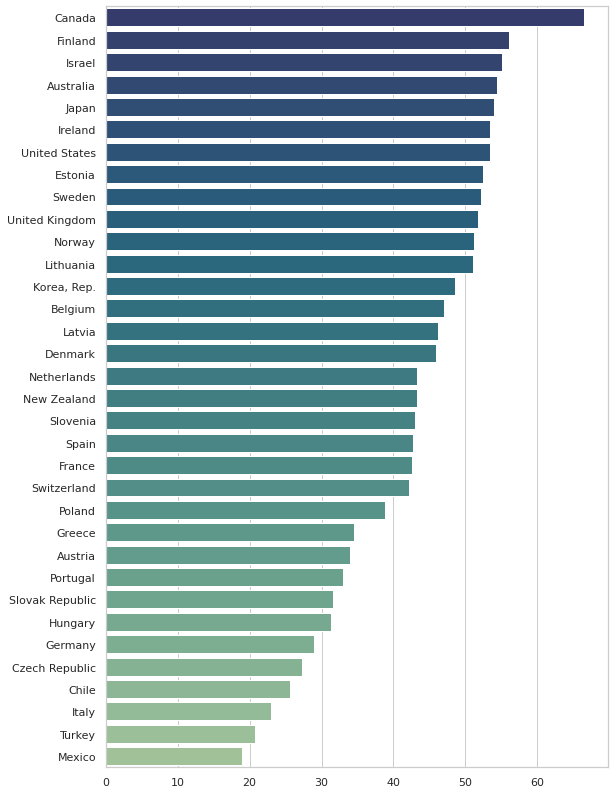

In [423]:
# create bar chart

sns.set(style="whitegrid")
#sns.set_theme(style='darkgrid')
plt.figure(figsize=(9, 14))

ax = sns.barplot( x="Women with tertiary educ perc",
                  y=df_sorted.index.values, 
                 #hue="room_type",
                  data=df_sorted,
                  order = df_sorted.index.values,
                  palette="crest_r")

#plt.xlabel("Airbnb Listings Density per Borough (1/ha)", size=14)
plt.xlabel(None)
plt.ylabel(None)

plt.savefig("Barplot_Listings_Density_per_Borough.png", bbox_inches = 'tight')

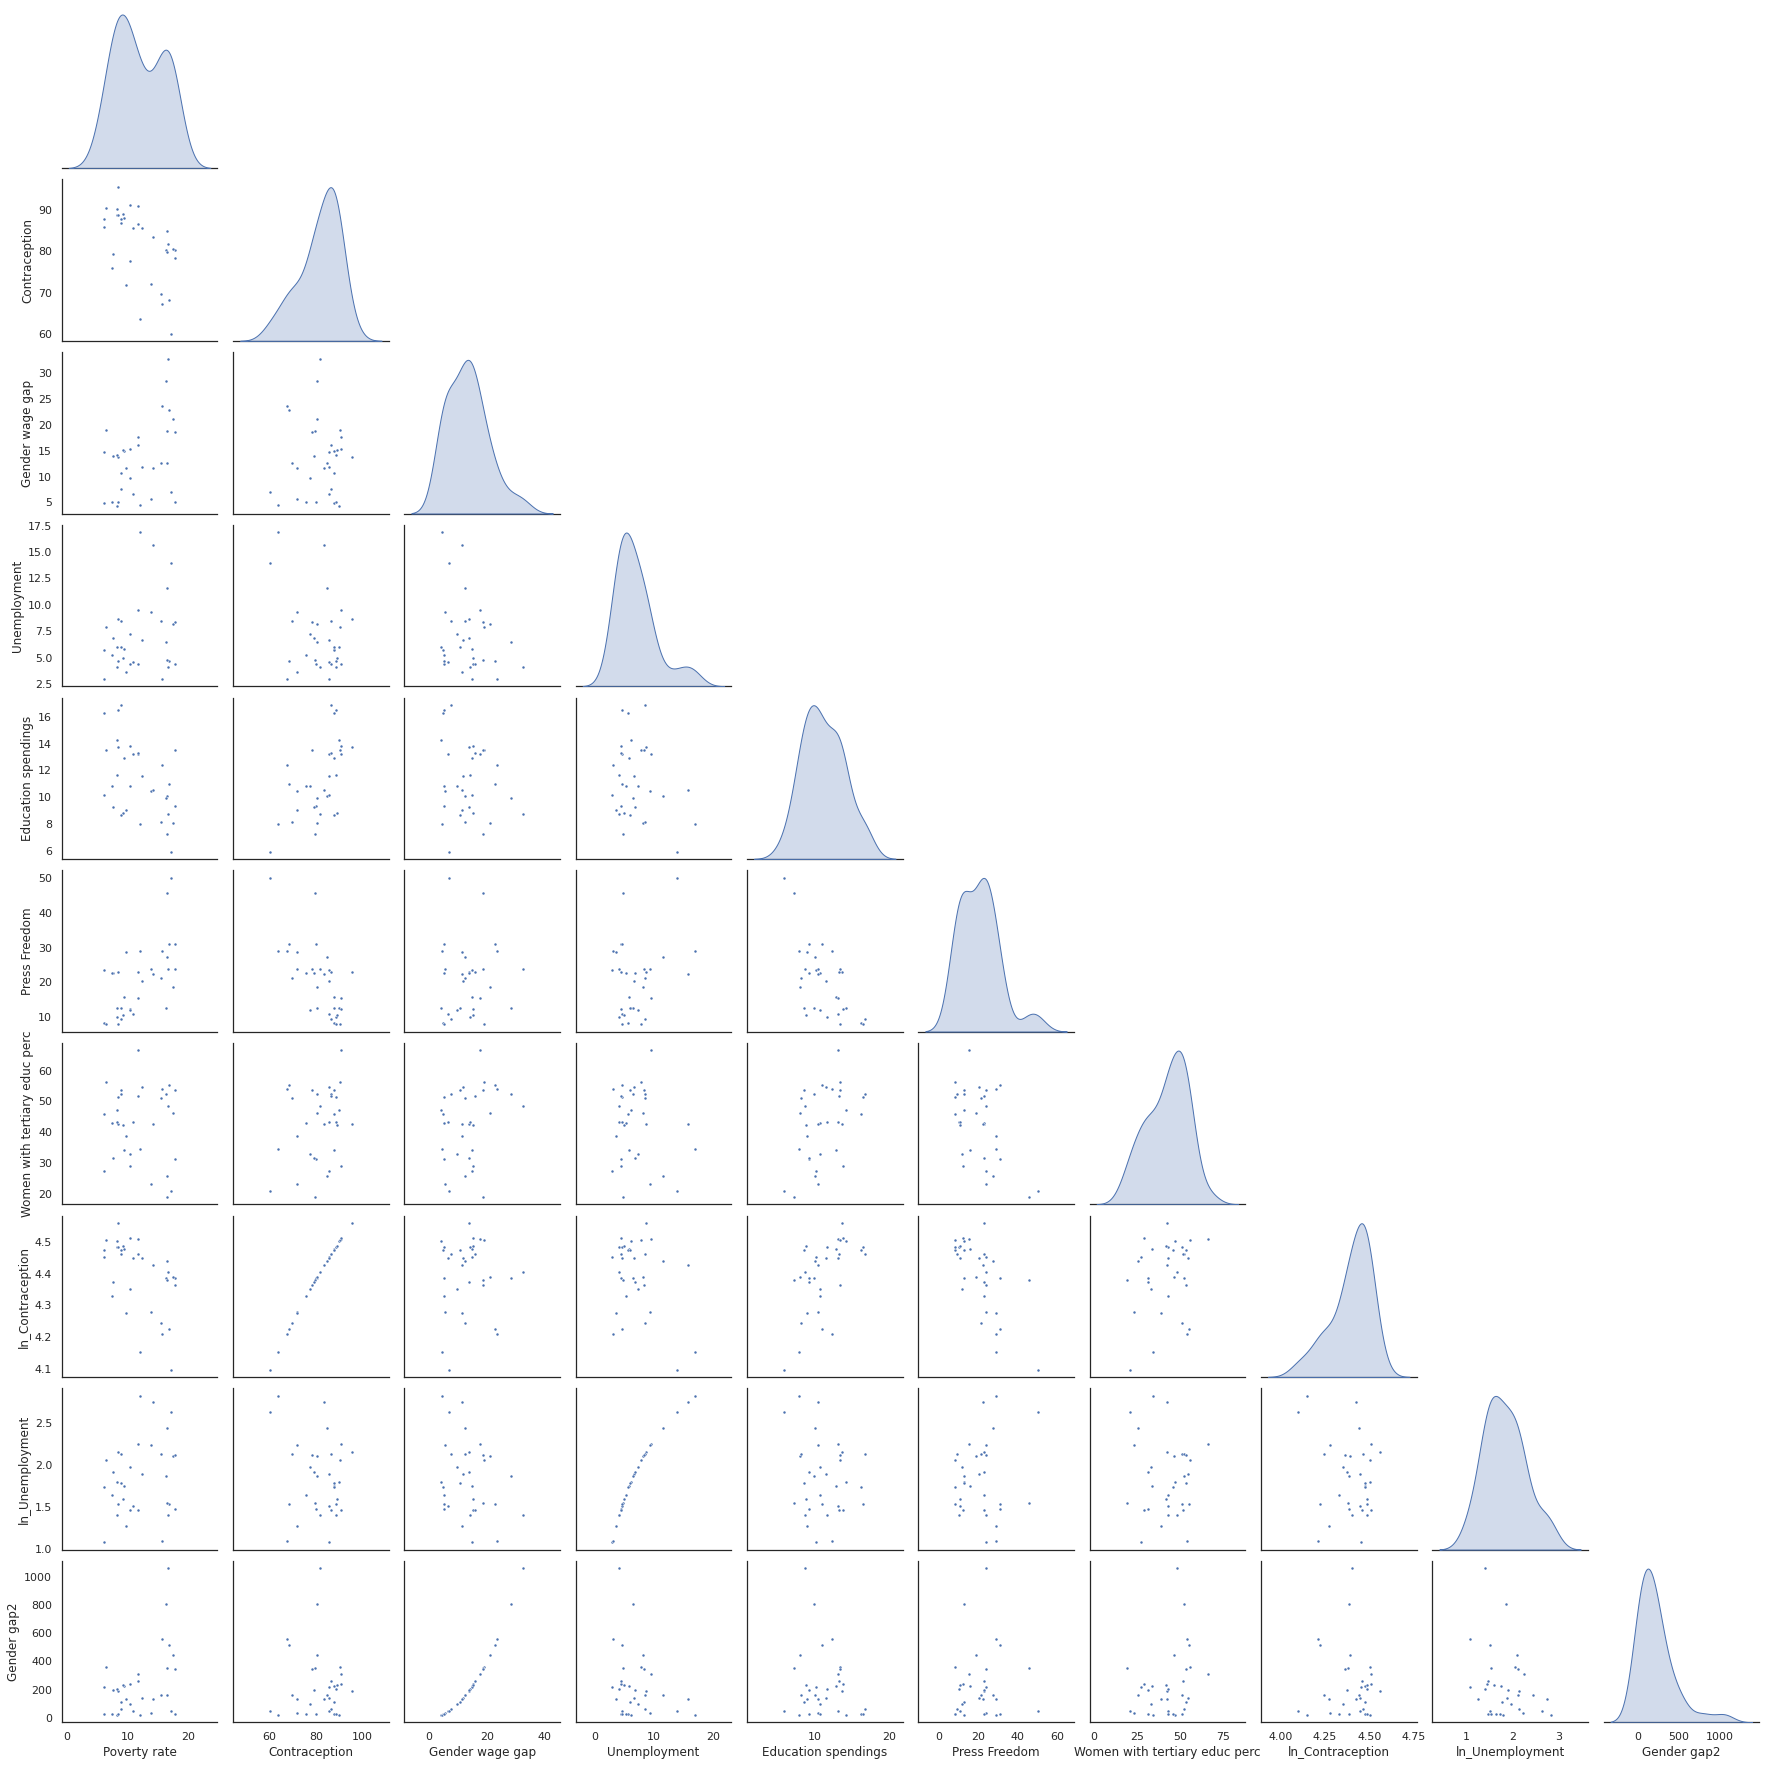

In [489]:
# using a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=df_merged, markers=".", diag_kind='kde', corner=True)

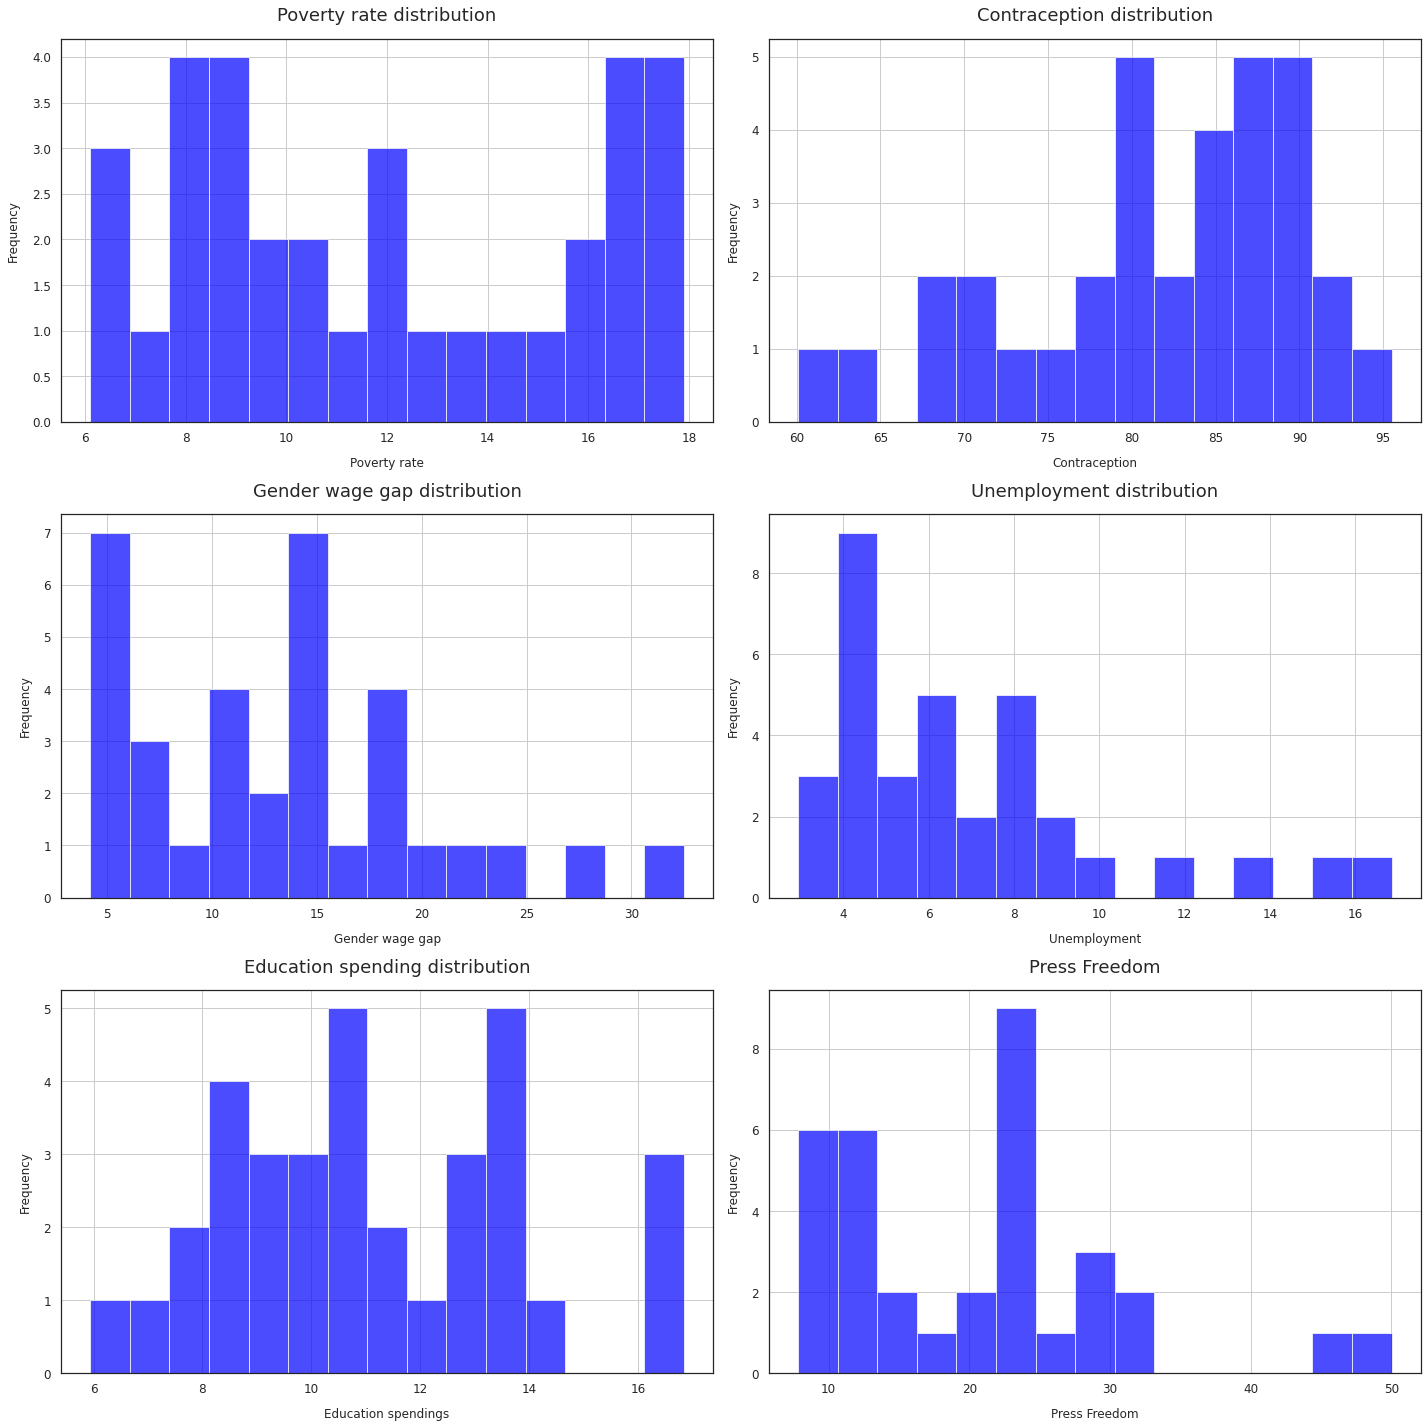

In [487]:
# code below from Philip Wilkinson : https://github.com/PhilipDW183/Convenience_store/blob/main/Convenience%20store%20exploration.ipynb

#set the columns we are interested in
columns = ['Poverty rate',
           'Contraception', 
           'Gender wage gap', 
           'Unemployment',
           'Education spendings', 
           'Press Freedom'
          ]

#set the histogram titles
hist_titles = ["Poverty rate distribution",
              "Contraception distribution",
              "Gender wage gap distribution",
              "Unemployment distribution",
              "Education spending distribution",
              "Press Freedom"]
#set the acis labels
axis_labels = ['Poverty rate',
           'Contraception', 
           'Gender wage gap', 
           'Unemployment',
           'Education spendings', 
           'Press Freedom'
          ]

#create a base axis for the plots
fig, ax = plt.subplots(3,2, figsize = (20,20))
#flatten the axis to make it easy to iteratre over
axis = ax.flatten()

#iterate over each columns using the labels information already set up
for i, col in enumerate(columns):
    
    #create the histogram using the column
    df_merged[col].hist(bins = 15, ax = axis[i],
                                       color = "blue",
                                       alpha = 0.7)
    #add label information
    axis[i].set_title(hist_titles[i], fontsize = 18, pad = 18)
    axis[i].set_ylabel("Frequency", fontsize  =12, labelpad = 12)
    axis[i].set_xlabel(f"{axis_labels[i]}", fontsize = 12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)

#remove the unused axis
#axis[5].set_axis_off()
#keep the layout tight
plt.tight_layout()
#show the plot 
plt.show()

<AxesSubplot:ylabel='Frequency'>

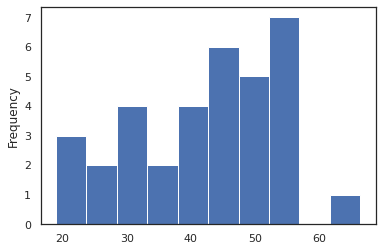

In [426]:
# plot histogram of the log transforme listings distribution 
df_merged['Women with tertiary educ perc'].plot.hist(bins=10)

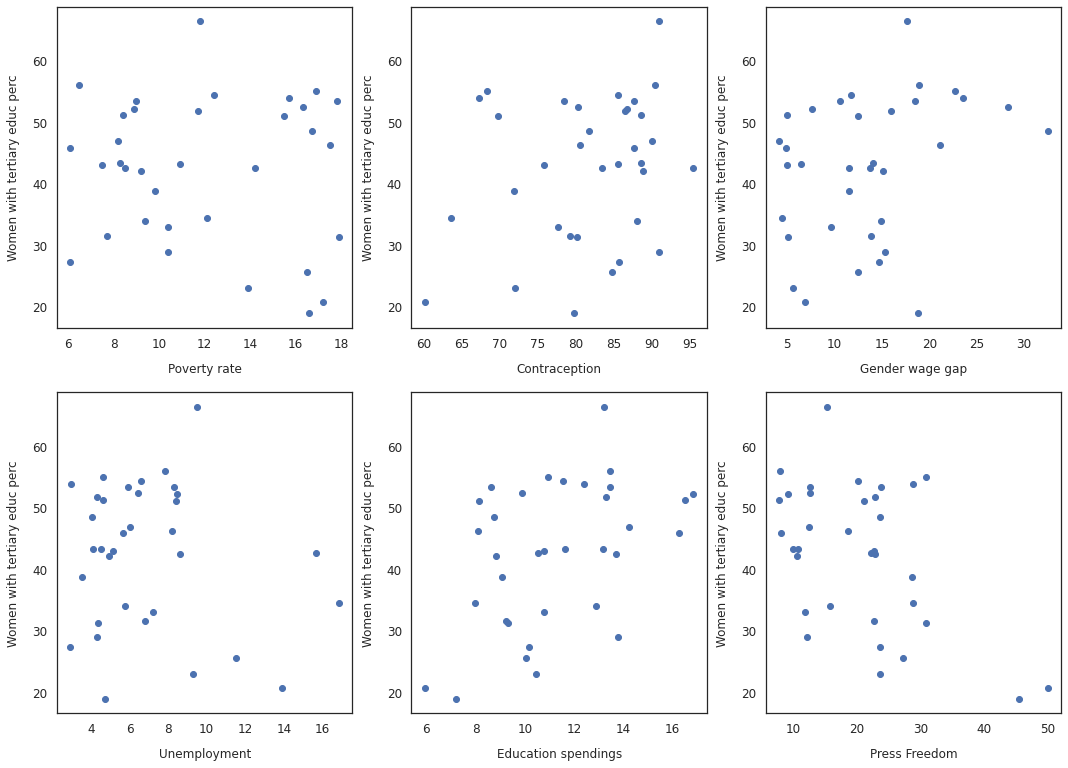

In [427]:

#create a base axis for the plots
fig, ax = plt.subplots(2,3, figsize = (18,13))
#flatten the axis to make it easy to iteratre over
axis = ax.flatten()

#iterate over each columns using the labels information already set up
for i, col in enumerate(columns):
    
    #sns.scatterplot(data=df_merged, x=col, y="Women with tertiary educ perc")
    # plot 
    axis[i].scatter(df_merged[col], df_merged["Women with tertiary educ perc"]) 
  #  axis[i].set_title(hist_titles[i], fontsize = 18, pad = 18)
    axis[i].set_ylabel("Women with tertiary educ perc", fontsize  =12, labelpad = 12)
    axis[i].set_xlabel(f"{axis_labels[i]}", fontsize = 12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12) 
    


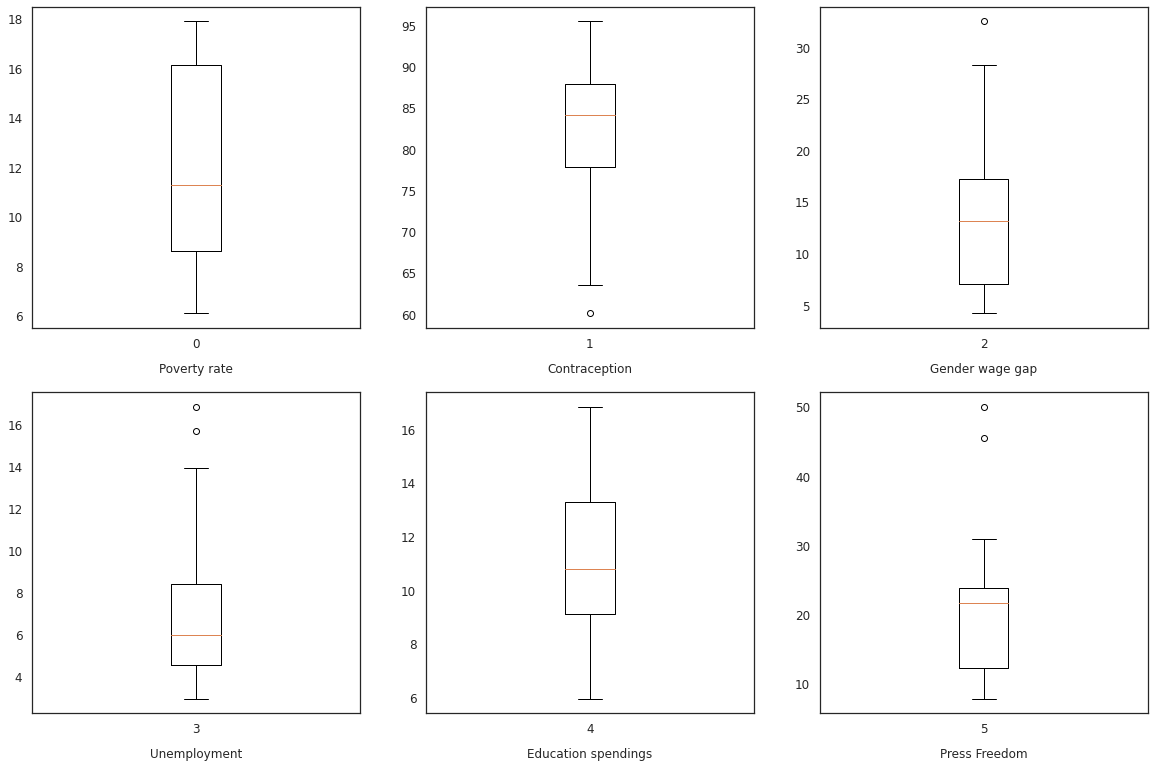

In [428]:
#df.price.plot.box() # boxplot
#create a base axis for the plots
fig, ax = plt.subplots(2,3, figsize = (20,13))
#flatten the axis to make it easy to iteratre over
axis = ax.flatten()

#iterate over each columns using the labels information already set up
for i, col in enumerate(columns):
    
    #sns.scatterplot(data=df_merged, x=col, y="Women with tertiary educ perc")
    # plot 
    axis[i].boxplot(df_merged[col], positions = [i])
   # axis[i].set_title(hist_titles[i], fontsize = 18, pad = 18)
   # axis[i].set_ylabel("Women with tertiary educ perc", fontsize  =12, labelpad = 12)
    axis[i].set_xlabel(f"{axis_labels[i]}", fontsize = 12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12) 
    


<AxesSubplot:>

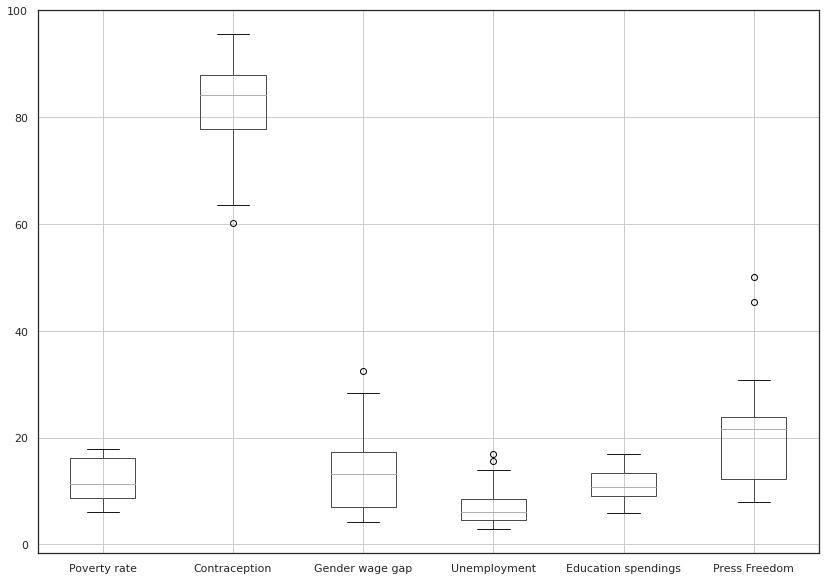

In [429]:
df_merged.boxplot(column=columns,
            figsize=(14,10))

In [430]:
## MLR

Text(0.5, 1.0, 'Correlation Matrix')

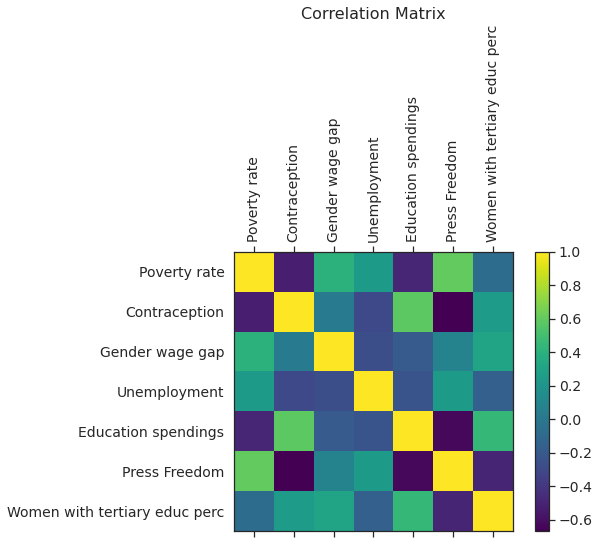

In [431]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(8, 5))
plt.matshow(df_merged.corr(), fignum=f.number, cmap='viridis')
plt.xticks(range(df_merged.shape[1]), df_merged.columns, fontsize=14, rotation=90)
plt.yticks(range(df_merged.shape[1]), df_merged.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [432]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [433]:
# using VIF to drop highly correlated variables

df_predictors_selected_VIF = drop_column_using_vif_(df_merged.drop('Women with tertiary educ perc', axis=1), thresh=5)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['Poverty rate', 'Contraception', 'Gender wage gap', 'Unemployment',
       'Education spendings', 'Press Freedom'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [434]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model_MLR = sm.OLS(endog=df_merged[['Women with tertiary educ perc']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Women with tertiary educ perc   R-squared:                       0.485
Model:                                       OLS   Adj. R-squared:                  0.370
Method:                            Least Squares   F-statistic:                     4.230
Date:                           Sat, 08 Jan 2022   Prob (F-statistic):            0.00397
Time:                                   11:50:20   Log-Likelihood:                -120.12
No. Observations:                             34   AIC:                             254.2
Df Residuals:                                 27   BIC:                             264.9
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  49.4529     26.923      1.837      0.077      -5.789     104.695
Poverty rate            0.3594      0.627      0.573      0.571      -0.928       1.646
Contraception          -0.3563      0.275     -1.297      0.205      -0.920       0.207
Gender wage gap         0.6774      0.293      2.315      0.028       0.077       1.278
Unemployment            0.2478      0.545      0.455      0.653      -0.871       1.367
Education spendings     1.7653      0.826      2.138      0.042       0.071       3.459
Press Freedom          -0.6252      0.253     -2.467      0.020      -1.145      -0.105
==============================================================================
Omnibus:                        0.618   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.208
Skew:                          -0.188   Prob(JB):                        0.901
Kurtosis:                       3.076   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

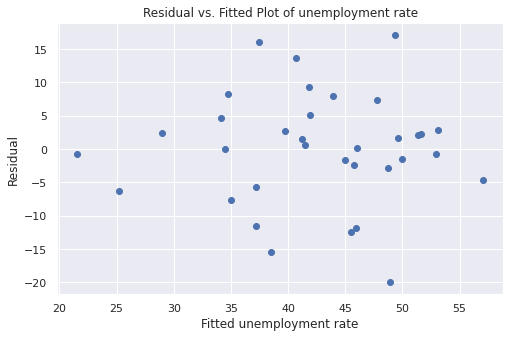

<Figure size 432x288 with 0 Axes>

In [453]:
sns.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 

f = plt.figure(figsize=(8, 5))
plt.scatter(model_MLR.fittedvalues, model_MLR.resid)
# adding title and labels
plt.xlabel('Fitted unemployment rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of unemployment rate')
plt.show()

plt.savefig("residuals.png")

## normalise

In [435]:
to_ln = [#'Poverty rate',
           'Contraception', 
         #  'Gender wage gap', 
           'Unemployment'
          # 'Education spendings', 
          # 'Press Freedom',
           #'Women with tertiary educ perc'
           ]

In [438]:
# add a column taking the log 
for col in to_ln:
    df_merged["ln_"+ col] = np.log(df_merged[col])
    
#joined_wards["ln_listings_density"]= np.log(joined_wards["listings_density"])

In [439]:
df_merged["Gender gap2"] = df_merged['Gender wage gap']**2

In [440]:
df_merged

,Poverty rate,Contraception,Gender wage gap,Unemployment,Education spendings,Press Freedom,Women with tertiary educ perc,ln_Contraception,ln_Unemployment,Gender gap2
Country,,,,,,,,,,
Australia,12.40,85.60,11.70,6.61,11.54,20.21,54.41,4.45,1.89,136.89
Austria,9.40,88.00,14.90,5.77,12.91,15.78,34.01,4.48,1.75,222.01
Belgium,8.20,90.10,4.20,6.01,14.23,12.57,46.96,4.50,1.79,17.64
Canada,11.80,90.90,17.60,9.48,13.21,15.29,66.45,4.51,2.25,309.76
Chile,16.50,84.80,12.50,11.51,10.07,27.31,25.63,4.44,2.44,156.25
Czech Republic,6.10,85.70,14.70,2.94,10.18,23.57,27.33,4.45,1.08,216.09
Denmark,6.10,87.70,4.90,5.66,16.26,8.13,45.87,4.47,1.73,24.01
Estonia,16.30,80.30,28.30,6.46,9.89,12.61,52.44,4.39,1.87,800.89
Finland,6.50,90.40,18.90,7.83,13.48,7.93,56.02,4.50,2.06,357.21


In [441]:
df_norm = df_merged.drop([
           'Contraception', 
           'Unemployment',
           ], axis=1)

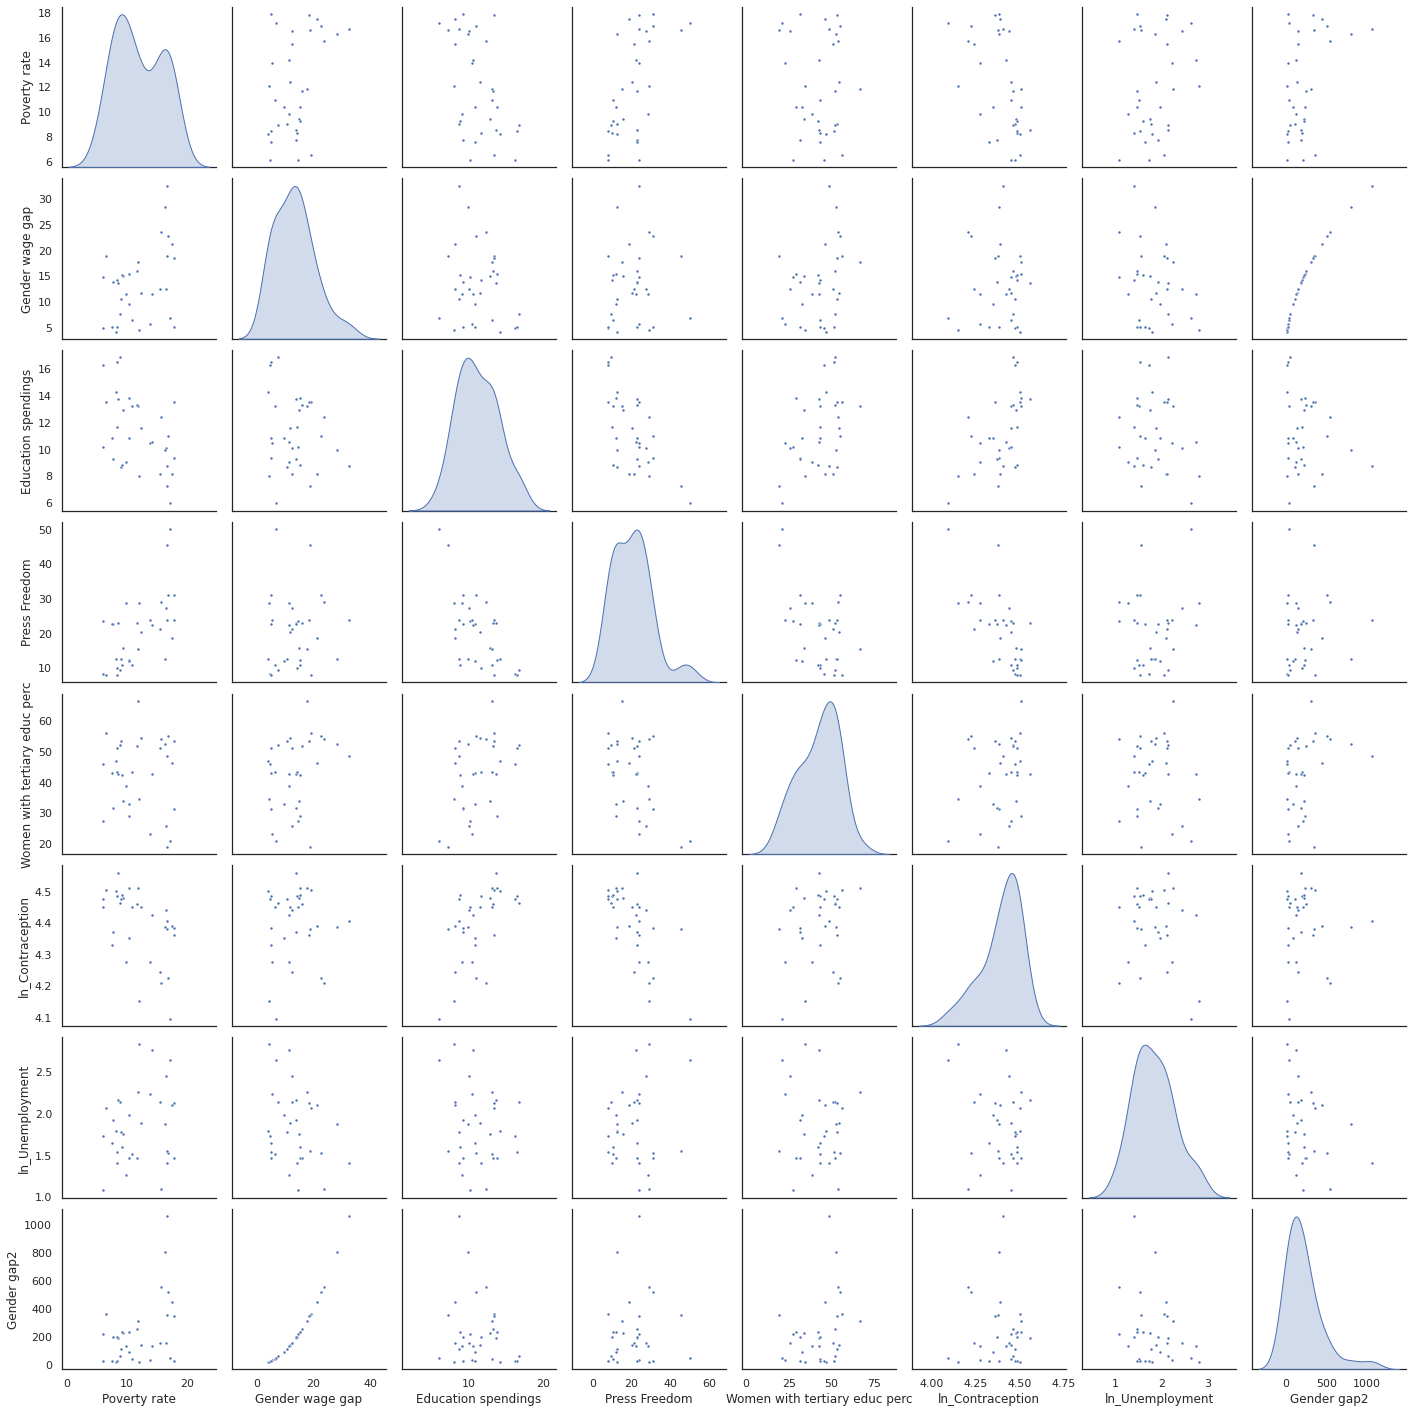

In [443]:
# using a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=df_norm , markers=".", diag_kind='kde', corner=False)

In [445]:
#from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
model_2 = sm.OLS(endog=df_norm[['Women with tertiary educ perc']], exog=sm.add_constant(df_norm.drop("Women with tertiary educ perc",axis=1))).fit()
model_2.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Women with tertiary educ perc   R-squared:                       0.489
Model:                                       OLS   Adj. R-squared:                  0.352
Method:                            Least Squares   F-statistic:                     3.560
Date:                           Sat, 08 Jan 2022   Prob (F-statistic):            0.00813
Time:                                   12:00:57   Log-Likelihood:                -119.96
No. Observations:                             34   AIC:                             255.9
Df Residuals:                                 26   BIC:                             268.1
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 149.2361     98.527      1.515      0.142     -53.290     351.762
Poverty rate            0.3577      0.660      0.542      0.592      -0.999       1.715
Gender wage gap         0.8061      0.906      0.890      0.382      -1.056       2.669
Education spendings     1.7742      0.835      2.125      0.043       0.058       3.490
Press Freedom          -0.6360      0.269     -2.360      0.026      -1.190      -0.082
ln_Contraception      -29.9502     22.276     -1.344      0.190     -75.740      15.839
ln_Unemployment         2.0557      4.273      0.481      0.634      -6.727      10.839
Gender gap2            -0.0037      0.028     -0.133      0.895      -0.061       0.054
==============================================================================
Omnibus:                        0.805   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.669   Jarque-Bera (JB):                0.328
Skew:                          -0.235   Prob(JB):                        0.849
Kurtosis:                       3.099   Cond. No.                     2.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

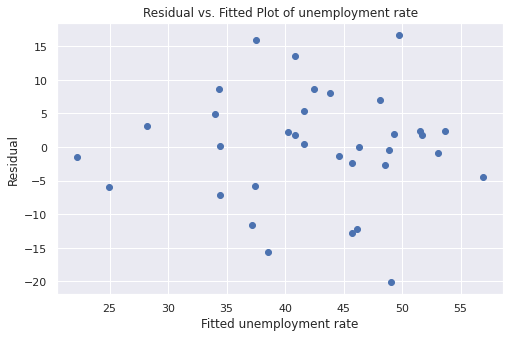

<Figure size 432x288 with 0 Axes>

In [454]:
sns.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 

f = plt.figure(figsize=(8, 5))
plt.scatter(model_2.fittedvalues, model_2.resid)
# adding title and labels
plt.xlabel('Fitted unemployment rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of unemployment rate')
plt.show()

plt.savefig("residuals.png")

In [446]:
df_norm.head(2)

,Poverty rate,Gender wage gap,Education spendings,Press Freedom,Women with tertiary educ perc,ln_Contraception,ln_Unemployment,Gender gap2
Country,,,,,,,,
Australia,12.40,11.70,11.54,20.21,54.41,4.45,1.89,136.89
Austria,9.40,14.90,12.91,15.78,34.01,4.48,1.75,222.01


In [450]:
df_drop= df_norm.drop(['Gender wage gap','Gender gap2','ln_Contraception','Poverty rate'], axis=1)

In [451]:
#from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
model_3 = sm.OLS(endog=df_drop[['Women with tertiary educ perc']], exog=sm.add_constant(df_drop.drop("Women with tertiary educ perc",axis=1))).fit()
model_3.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Women with tertiary educ perc   R-squared:                       0.274
Model:                                       OLS   Adj. R-squared:                  0.202
Method:                            Least Squares   F-statistic:                     3.780
Date:                           Sat, 08 Jan 2022   Prob (F-statistic):             0.0206
Time:                                   13:32:30   Log-Likelihood:                -125.94
No. Observations:                             34   AIC:                             259.9
Df Residuals:                                 30   BIC:                             266.0
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  40.6109     15.904      2.553      0.016       8.130      73.092
Education spendings     0.9329      0.870      1.072      0.292      -0.845       2.710
Press Freedom          -0.4199      0.235     -1.788      0.084      -0.900       0.060
ln_Unemployment        -0.0037      4.205     -0.001      0.999      -8.592       8.585
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.811
Skew:                           0.024   Prob(JB):                        0.667
Kurtosis:                       2.245   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
#df_merged["unemp2"]=df_merged["Unemployment"]**2
#df_merged

,Poverty rate,Well being,Gender wage gap,Unemployment,Education spendings,Women with tertiary educ perc,unemp2
Country,,,,,,,
Australia,12.40,7.10,11.70,6.61,11.54,54.41,43.69
Austria,9.40,7.20,14.90,5.77,12.91,34.01,33.29
Belgium,8.20,6.80,4.20,6.01,14.23,46.96,36.12
Canada,11.80,7.00,17.60,9.48,13.21,66.45,89.87
Chile,16.50,6.20,12.50,11.51,10.07,25.63,132.48
Czech Republic,6.10,7.00,14.70,2.94,10.18,27.33,8.64
Denmark,6.10,7.50,4.90,5.66,16.26,45.87,32.04
Estonia,16.30,6.50,28.30,6.46,9.89,52.44,41.73
Finland,6.50,7.90,18.90,7.83,13.48,56.02,61.31


In [191]:

model_3 = sm.OLS(endog=df_merged[['Women with tertiary educ perc']], exog=sm.add_constant(df_merged.drop("Women with tertiary educ perc", axis=1))).fit()
model_3.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Women with tertiary educ perc   R-squared:                       0.369
Model:                                       OLS   Adj. R-squared:                  0.239
Method:                            Least Squares   F-statistic:                     2.828
Date:                           Fri, 07 Jan 2022   Prob (F-statistic):             0.0272
Time:                                   19:34:55   Log-Likelihood:                -130.27
No. Observations:                             36   AIC:                             274.5
Df Residuals:                                 29   BIC:                             285.6
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -37.4368     27.622     -1.355      0.186     -93.929      19.056
Poverty rate            0.4334      0.628      0.690      0.496      -0.852       1.718
Well being              7.3606      3.895      1.890      0.069      -0.605      15.326
Gender wage gap         0.4756      0.290      1.638      0.112      -0.118       1.069
Unemployment            1.8527      2.375      0.780      0.442      -3.004       6.709
Education spendings     1.0330      0.831      1.244      0.224      -0.666       2.732
unemp2                 -0.0818      0.126     -0.649      0.521      -0.340       0.176
==============================================================================
Omnibus:                        2.353   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                2.081
Skew:                          -0.569   Prob(JB):                        0.353
Kurtosis:                       2.697   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

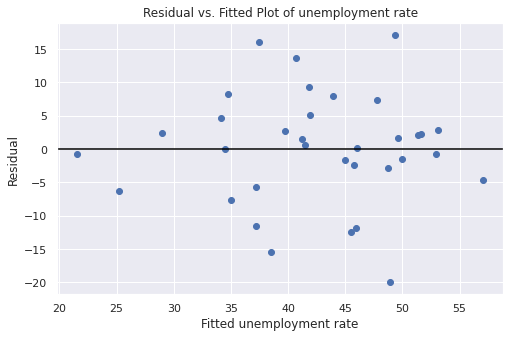

<Figure size 432x288 with 0 Axes>

In [457]:
sns.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 

f = plt.figure(figsize=(8, 5))
plt.scatter(model_MLR.fittedvalues, model_MLR.resid)
plt.axhline(y = 0, color = "black", linestyle = "-")
# adding title and labels
plt.xlabel('Fitted unemployment rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of unemployment rate')
plt.show()

plt.savefig("residuals.png")

# Residual analysis

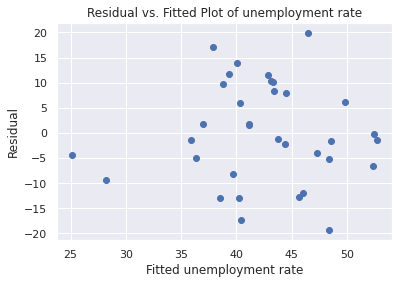

In [455]:
sns.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 
plt.scatter(model_3.fittedvalues, model_3.resid)
# adding title and labels
plt.xlabel('Fitted unemployment rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of unemployment rate')
plt.show()

## standardise

In [490]:
# merge 
df_merged2 = pd.merge( df2_info, tet_edu ,left_on = "Country", right_on = "Country_name", how = "left").drop(columns=["Country_name"])
df_merged2.head()

,Country,Poverty rate after taxes and transfers (%),Demand for family planning satisfied by modern methods (% of females aged 15 to,Gender wage gap (% of male median wage),Unemployment rate (% of total labor force),Government spending on health and education (% of GDP),Press Freedom Index (best 0-100 worst),Women with tertiary educ perc
0,Australia,12.40,85.60,11.70,6.61,11.54,20.21,54.41
1,Austria,9.40,88.00,14.90,5.77,12.91,15.78,34.01
2,Belgium,8.20,90.10,4.20,6.01,14.23,12.57,46.96
3,Canada,11.80,90.90,17.60,9.48,13.21,15.29,66.45
4,Chile,16.50,84.80,12.50,11.51,10.07,27.31,25.63


In [491]:
#rename column names
df_merged2.rename(columns = { 
                            'Demand for family planning satisfied by modern methods (% of females aged 15 to ':'Contraception',
                            'Gender wage gap (% of male median wage)':"Gender wage gap",
                            #'CO₂ emissions from fuel combustion for electricity and heating per total electri': 'CO₂ emissions',
                            'Unemployment rate (% of total labor force)': 'Unemployment',
                            'Poverty rate after taxes and transfers (%)':'Poverty rate',
                            'Government spending on health and education (% of GDP)':'Education spendings',
                            'Press Freedom Index (best 0-100 worst)': "Press Freedom"
                    }, inplace = True)


In [492]:
df_stand = df_merged2.set_index('Country')

In [ ]:
cols = ['Poverty rate',
           'Contraception', 
           'Gender wage gap', 
           'Unemployment'
           'Education spendings', 
           'Press Freedom',
           'Women with tertiary educ perc'
           ]

In [ ]:
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [493]:
from scipy.stats import zscore
df_stand.apply(zscore)

,Poverty rate,Contraception,Gender wage gap,Unemployment,Education spendings,Press Freedom,Women with tertiary educ perc
Country,,,,,,,
Australia,0.12,0.48,-0.24,-0.10,0.12,-0.03,1.04
Austria,-0.66,0.76,0.22,-0.35,0.63,-0.48,-0.73
Belgium,-0.97,1.00,-1.33,-0.28,1.13,-0.80,0.39
Canada,-0.04,1.10,0.61,0.76,0.74,-0.53,2.08
Chile,1.19,0.38,-0.13,1.36,-0.43,0.69,-1.46
Czech Republic,-1.52,0.49,0.19,-1.20,-0.39,0.31,-1.31
Denmark,-1.52,0.72,-1.23,-0.38,1.89,-1.25,0.29
Estonia,1.13,-0.14,2.16,-0.15,-0.49,-0.80,0.86
Finland,-1.42,1.04,0.80,0.26,0.85,-1.27,1.17


In [483]:
import sklearn
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [484]:
# rbs = RobustScaler(quantile_range=[0.025,0.975])
mms = MinMaxScaler(feature_range=(-1,1))
pts = PowerTransformer(method='box-cox')

In [485]:
# Rescale the columns 
for c in df_stand .columns:
    df_stand[c] = mms.fit_transform(df_stand[c].values.reshape(-1,1))
df_stand.head(10)

,Poverty rate,Contraception,Gender wage gap,Unemployment,Education spendings,Press Freedom,Women with tertiary educ perc
Country,,,,,,,
Australia,0.07,0.44,-0.47,-0.47,0.03,-0.41,0.49
Austria,-0.44,0.58,-0.24,-0.59,0.28,-0.62,-0.37
Belgium,-0.64,0.69,-1.00,-0.56,0.52,-0.78,0.18
Canada,-0.03,0.74,-0.05,-0.06,0.33,-0.65,1.00
Chile,0.76,0.40,-0.41,0.23,-0.24,-0.08,-0.72
Czech Republic,-1.00,0.45,-0.26,-1.00,-0.22,-0.25,-0.65
Denmark,-1.00,0.56,-0.95,-0.61,0.89,-0.99,0.13
Estonia,0.73,0.14,0.70,-0.49,-0.27,-0.77,0.41
Finland,-0.93,0.71,0.04,-0.30,0.38,-1.00,0.56


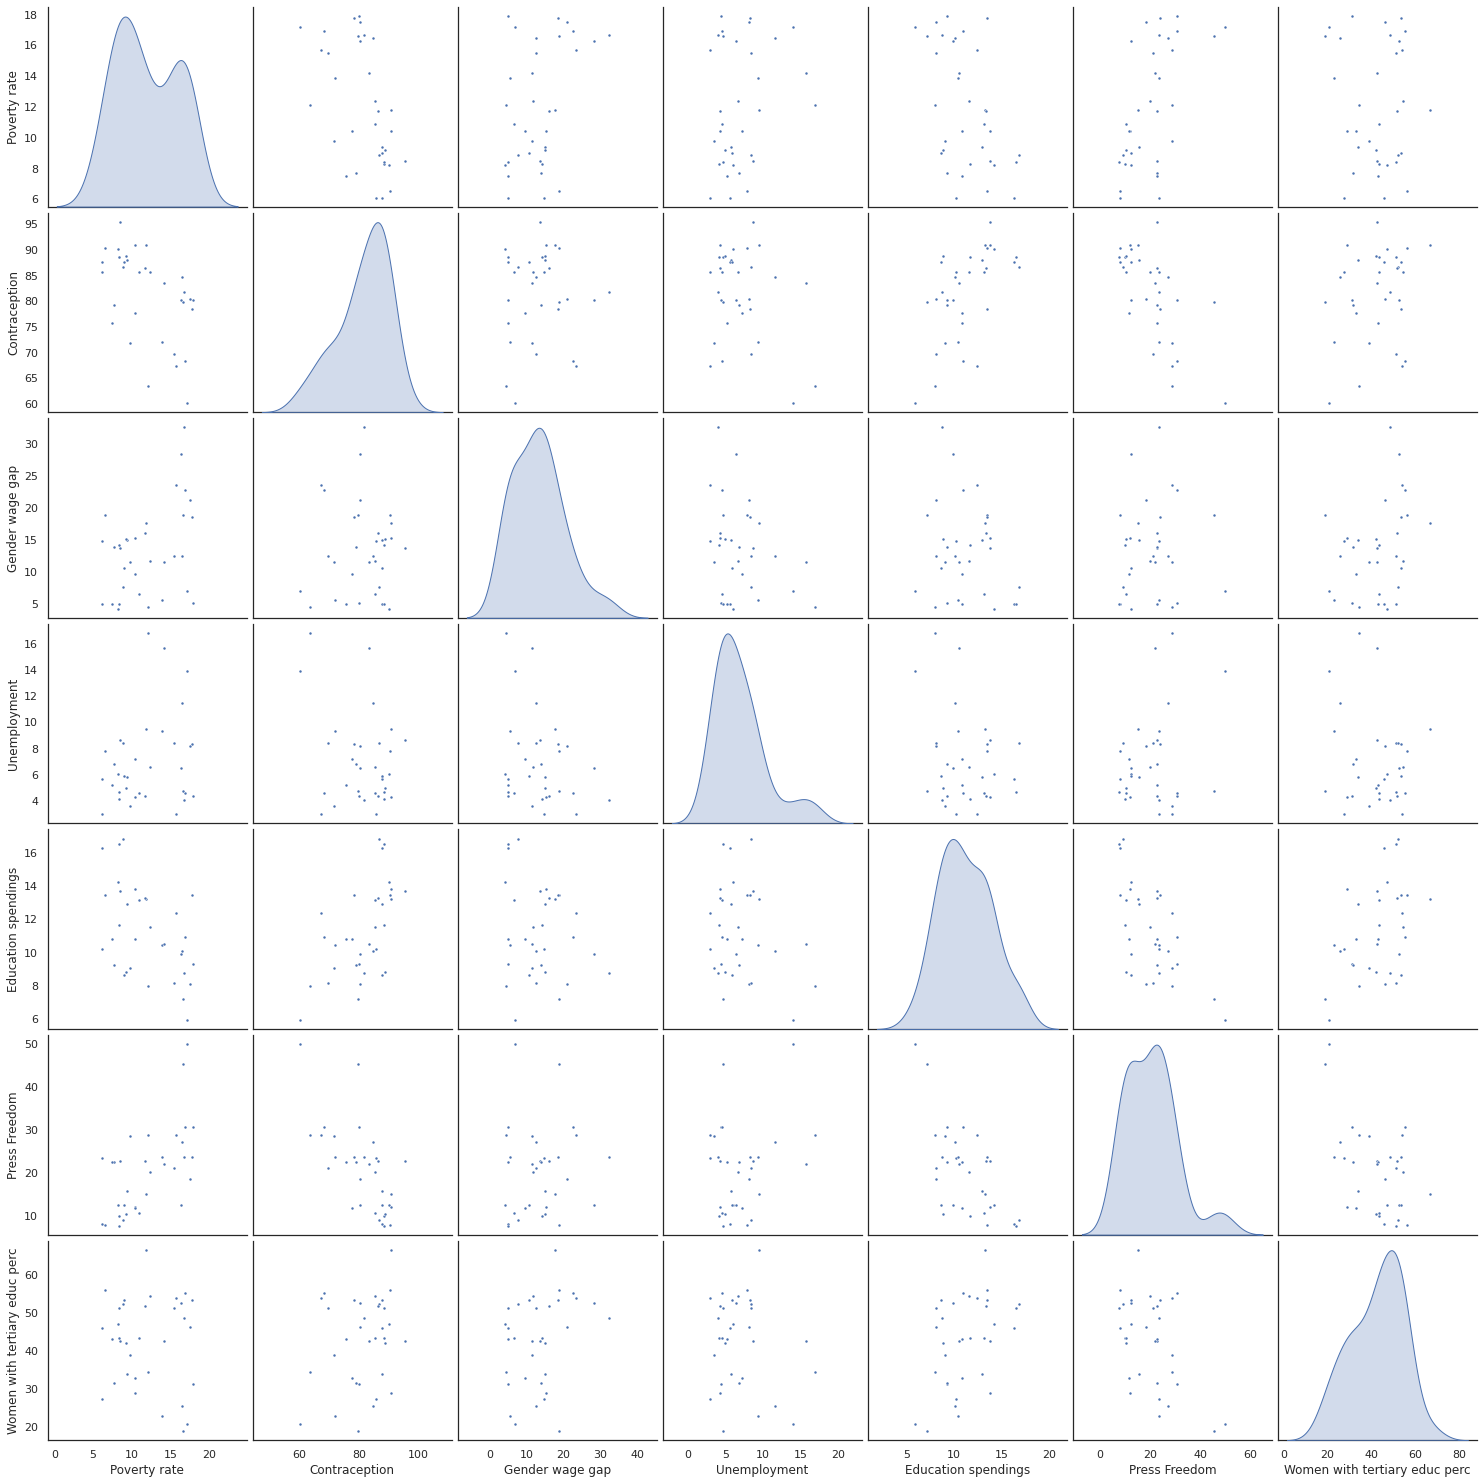

In [494]:
# quick plot to visualise the results
sns.set(style="white")
sns.pairplot(df_stand, markers=".", height=3, diag_kind='kde');

In [287]:
clustA = df_merged

In [288]:
#import the necessary libraries
from sklearn import metrics
from sklearn.cluster import KMeans

#create an empty list
list_SSE = []
#set the range of clusters to evaluate
min_k = 1
max_k = 11
range_k = range(min_k, max_k)

In [289]:
#iterate over the range
for i in range_k:
    #perform the clustering algorithm
    km = KMeans(n_clusters = i,
               init = "random",
               n_init = 10,
               max_iter = 300,
               tol = 1e-04, 
               random_state = 22)
    #fit this to the data
    km.fit(clustA[columns])
    #add the SEE score
    list_SSE.append(km.inertia_)   

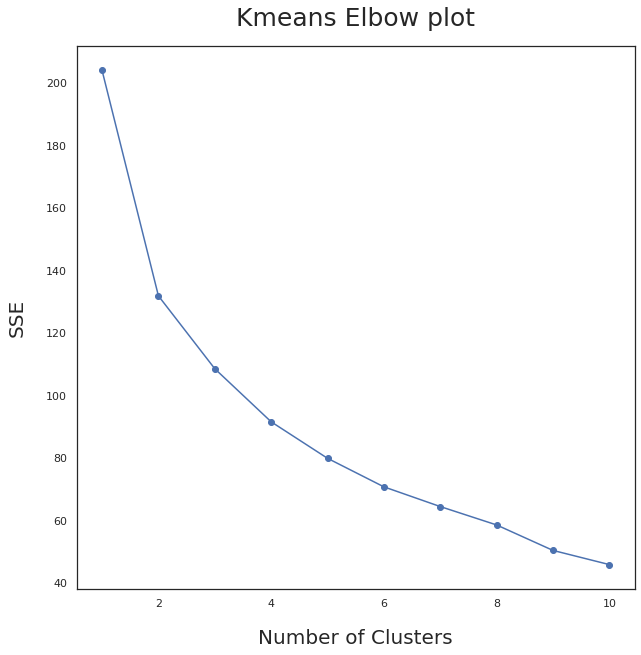

In [290]:


#create the base plots
fig, ax = plt.subplots(1,1, figsize = (10,10))

#add the data to the axis
ax.plot(range_k, list_SSE, marker = "o")

#add the necessary labels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("SSE", fontsize =20, labelpad = 20)
ax.set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)

plt.show()



In [291]:


#for the silhouette score
import random

#create an empty list
silhouette = []

#iteratre over the number of clusters to evaluate
for i in range(2,10):
    
    #create an empty list to hold the averages
    average = []
    #perform the clustering algorithm several times for each number of clusters
    for x in range(1,10):
        #set the number of clusters
        k_cluster = i
        #generate a arandom seed number
        random_seed = random.randint(1,101)
        #apply the KMeans clustering algorithm
        kmeans_method = KMeans(n_clusters = k_cluster,
                              random_state = random_seed)
        kmeans_method.fit(clustA[columns])
        #extract the labels
        labels = kmeans_method.labels_
        #extract the silhouette score
        a = metrics.silhouette_score(clustA[columns], labels)
        #append the result
        average.append(a)
    #clauclate the average silhouette score for each number of clusters 
    silhouette.append(sum(average)/len(average))



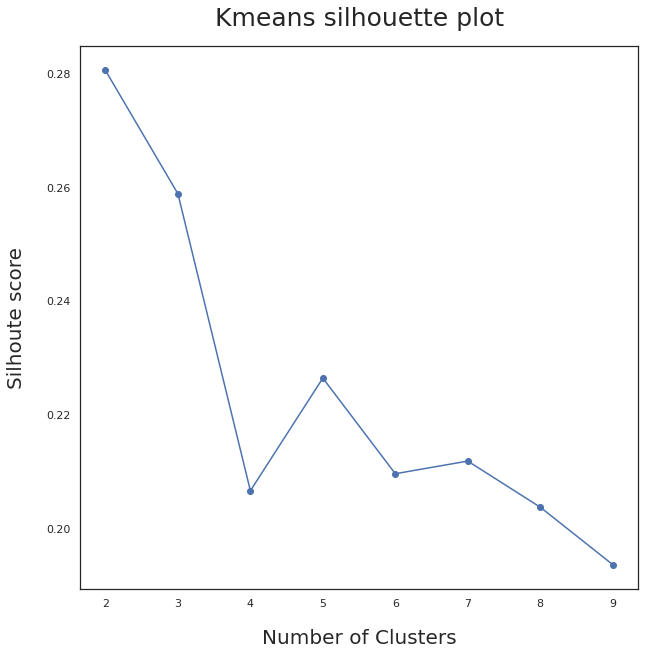

In [292]:
#create a base axis
fig, ax = plt.subplots(1,1, figsize = (10,10))

#plot the results
ax.plot(range(2,10), silhouette, marker = "o")

#add the lbels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax.set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

plt.show()

Text(0.5, 1.0, 'Kmeans Elbow plot')

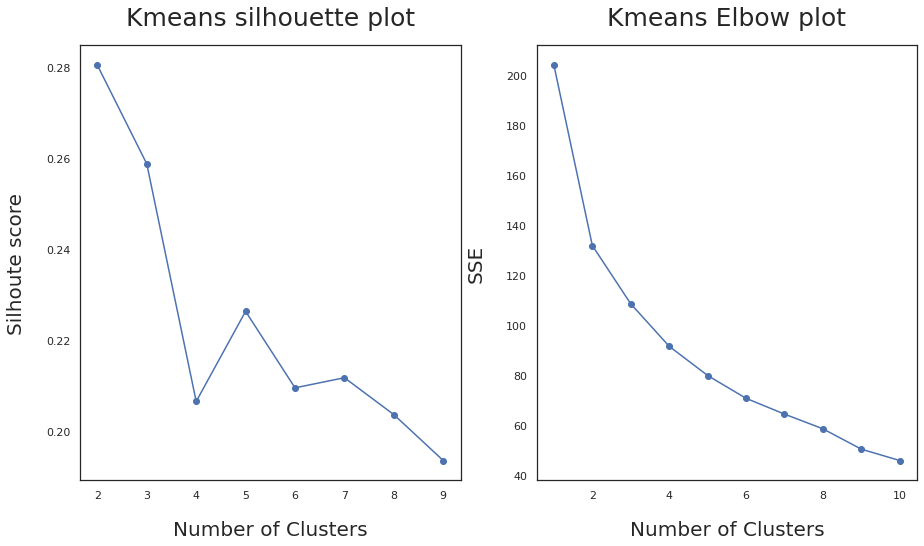

In [293]:


#combine both plots
fig, ax = plt.subplots(1,2, figsize = (15,8))

ax[0].plot(range(2,10), silhouette, marker = "o")
ax[0].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[0].set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax[0].set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

ax[1].plot(range_k, list_SSE, marker = "o")
ax[1].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[1].set_ylabel("SSE", fontsize =20, labelpad = 20)
ax[1].set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)



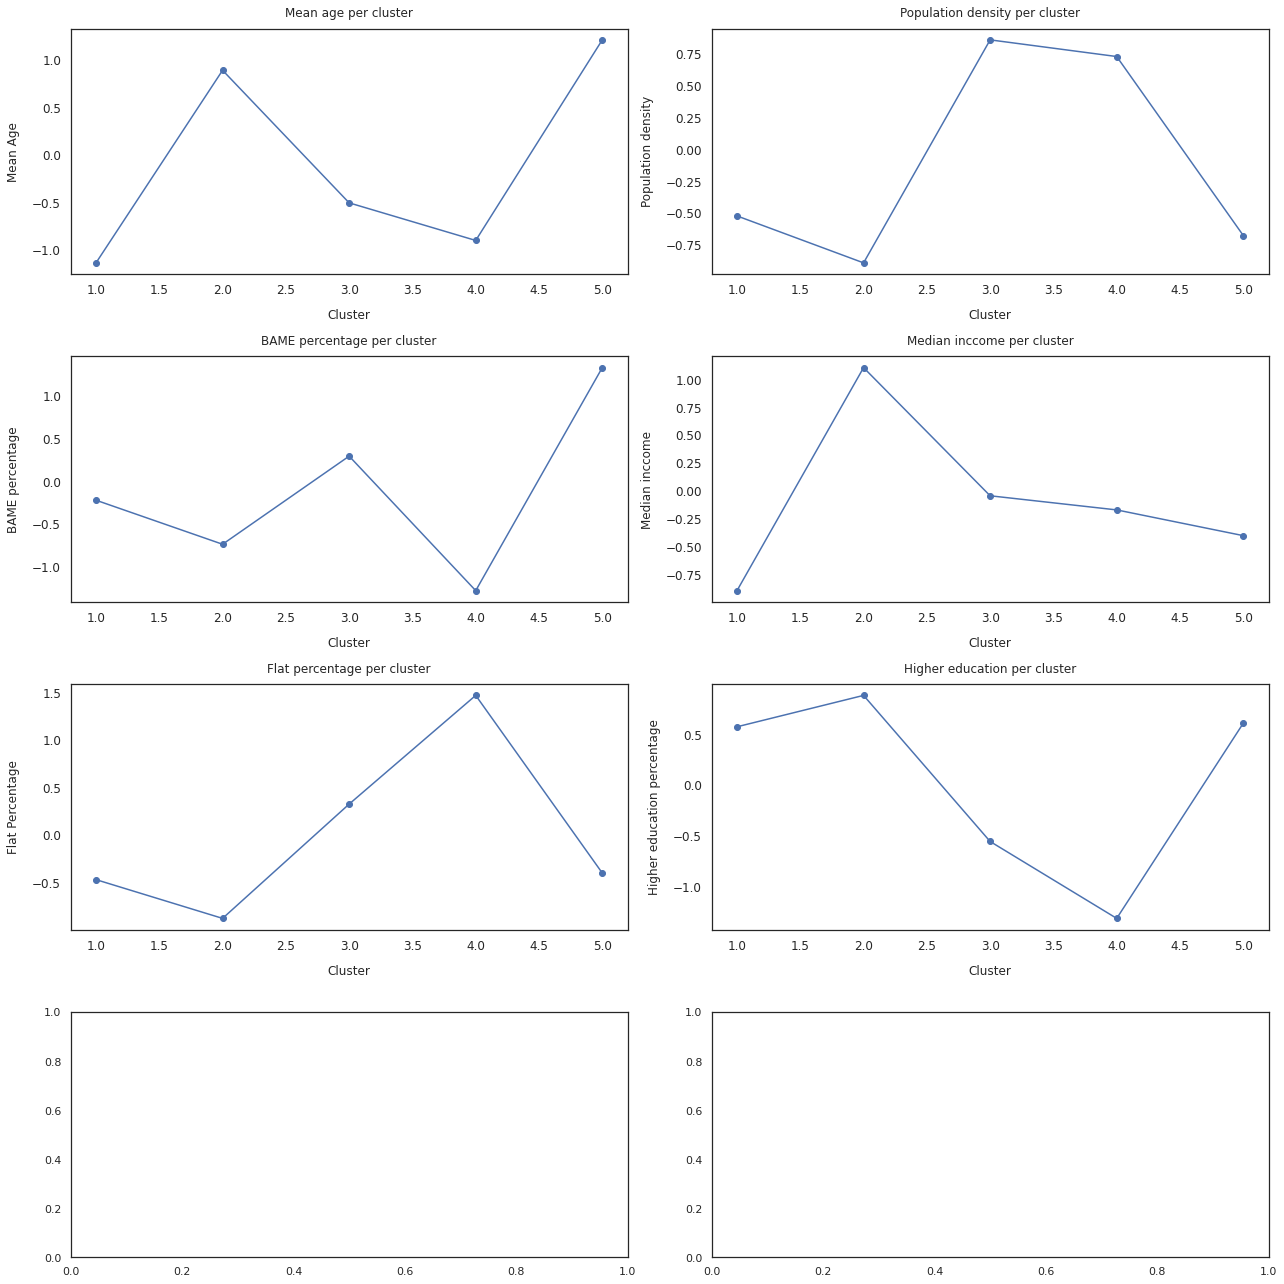

In [295]:
#perform the clustering with the chosen number of clusters
kmeans_method = KMeans(n_clusters = 5,
                        random_state = 22,
                      n_init = 10)
kmeans_method.fit(clustA[columns])


#creating plots for the results to understand the means


#set the titles
titles = [ "Mean age per cluster",
              "Population density per cluster",
              "BAME percentage per cluster",
              "Median inccome per cluster",
              "Flat percentage per cluster",
              "Higher education per cluster",
              "Listings density per cluster",
              "Transport accessibility per cluster" ]
#set the labels
ylabels = ["Mean Age", 
              "Population density",
              "BAME percentage",
              "Median inccome",
              "Flat Percentage",
              "Higher education percentage",
              "Listigns density",
              "Transport accessibility score"]
#extract the cluster labels and add these back to the data
labels = kmeans_method.labels_
df_merged["labels"] = labels
df_merged["labels"] = df_merged["labels"] + 1

#create a base plot
fig, ax = plt.subplots(4,2, figsize = (18,18))
#flatten the axis
axis = ax.flatten()

#iterate over each column to create plots for each 
for i, col in enumerate(columns):
    #create an empty dictionary
    col_dict = {}
     #iterate over each label
        
    for label in df_merged["labels"].unique().tolist():
        #crete a new dataframe for each label
        label_df = df_merged[df_merged["labels"] == label]
        #add the mean to the dataframe
        col_dict[label] = label_df[col].mean()
    #convert the dictionary to a dataframe
    column_df = pd.DataFrame.from_dict(col_dict, orient = "index")
    #reset the index
    column_df.reset_index(inplace=True)
    #sort the values by the index
    column_df.sort_values(by = "index", inplace=True)

        #plot the results
    axis[i].plot(column_df["index"], column_df[0],
                marker = "o")
    
    #set the plots up
    axis[i].set_title(titles[i], fontsize = 12, pad = 12)
    axis[i].set_xlabel("Cluster", fontsize = 12, labelpad = 12)
    axis[i].set_ylabel(ylabels[i], fontsize =12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)


#set the layout to tight so no overalp
plt.tight_layout()
 

In [60]:
#rename column names
df_merged.rename(columns = {'Subjective well-being (average ladder score, worst 0-10 best)':'Well being', 
                            'Demand for family planning satisfied by modern methods (% of females aged 15 to ':'Contraception',
                            'Gender wage gap (% of male median wage)':"Gender wage gap",
                            'CO₂ emissions from fuel combustion for electricity and heating per total electri': 'CO₂ emissions',
                            'Unemployment rate (% of total labor force)': 'Unemployment',
                            'Gini coefficient adjusted for top income': 'Gini',
                            'Poverty rate after taxes and transfers (%)':'Poverty rate'
                            'Government spending on health and education (% of GDP)':'Education spendings'
                    }, inplace = True)
